In [3]:
# import packages
import pandas as pd
import numpy as np

In [ ]:
# read data
train = pd.read_csv(".\data\path_ames_train.csv")
test = pd.read_csv(".\data\path_ames_test.csv")

In [7]:
# split into features and target
X_train = train[['ExterQual','AllFlrsSF','GarageArea','SimplOverallCond','GrLivArea','TotRmsAbvGrd','LotFrontage']]
y_train = train['SalePrice']

X_test = test[['ExterQual','AllFlrsSF','GarageArea','SimplOverallCond','GrLivArea','TotRmsAbvGrd','LotFrontage']]
y_test = test['SalePrice']

In [8]:
train.head()

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,4,1316,1316,2,397,6,65.0,169990
1,4,2028,2028,2,880,7,88.0,369900
2,3,1072,1072,2,525,5,35.0,140000
3,3,1048,1048,2,286,6,72.0,135000
4,3,1779,1779,2,546,6,80.0,197900


In [9]:
test.head()

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,3,1839,1839,3,416,7,110.0,257500
1,3,2126,2126,2,538,7,0.0,185000
2,4,1709,1709,2,380,7,24.0,130000
3,3,1902,1902,2,539,8,68.0,112000
4,3,1072,1072,2,525,5,35.0,148000


# OLS

In [13]:
# import packages
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    N = np.size(x)
 
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - (N*m_y*m_x)
    SS_xx = np.sum(x*x) - (N*m_x*m_x)
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0,b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()# Visualize your results

Estimated coefficients:
b_0 = 74795.1260414561 
b_1 = 214.31004114071553


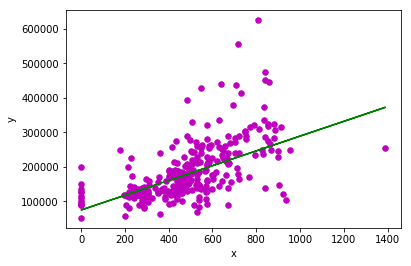

In [14]:
# estimating coefficients
values = estimate_coef(train['GarageArea'],train['SalePrice'])
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(values[0], values[1]))

# plotting regression line
plot_regression_line(test['GarageArea'], test['SalePrice'], values)

# Model building with scikit-learn

In [16]:
# import packages
from sklearn.linear_model import LinearRegression 

# instantiate linear model
linreg = LinearRegression()

# fit model on training data
linreg.fit(X_train, np.log(y_train))

# predict on test features
y_pred = linreg.predict(X_test)

# display predictions
print("y_pred: ",y_pred)


y_pred:  [12.11227082 12.19875709 12.17873549 12.09451926 11.79496421 11.62810742
 12.23094302 11.66779875 12.83933008 11.42802489 13.03969447 11.48996121
 11.96267792 12.15572954 11.84253379 11.80049608 11.63719563 11.95712008
 12.33129216 12.18239258 12.02229166 12.0255932  12.23719561 11.87200608
 12.44798664 12.643851   12.47162239 12.5982682  11.8215798  11.50148537
 11.789251   13.22072258 11.50903908 11.87175444 12.20648447 12.23039239
 11.69069064 12.89000353 11.7661653  12.30551334 12.29771967 11.68183125
 12.84865739 11.97590572 12.48417858 12.05078167 11.76415223 11.68701845
 12.25244997 12.23563131 11.51096238 12.6868023  11.79805816 11.80839364
 12.05803133 12.79445006 12.15644059 12.02083321 11.5972928  12.61133737
 12.17873549 12.98542578 12.19936653 11.39135943 11.90586361 11.8061422
 11.79982215 11.72513481 11.82121504 11.56637513 11.81933974 12.42686173
 11.68135512 11.73767058 11.78233782 12.74326629 12.23338334 11.7939831
 12.11819825 12.03048394 11.68266492 12.1271

# Model Evaluation: Mean Absolute Error

In [20]:
# import packages
from sklearn.metrics import mean_absolute_error

# MAE calculation
mae = mean_absolute_error(y_test, np.exp(y_pred))

print("mae: ",mae)

mae:  29158.295036636522


# Evaluation : Root Mean Squared Error

In [19]:
# import packages
from sklearn.metrics import mean_squared_error

# RMSE calculation
rmse =  np.sqrt(mean_squared_error(y_test, np.exp(y_pred)))

print("rmse: ",rmse)

rmse:  42842.86889122488
